In [63]:
import pandas as pd

Name: pandas
Version: 1.4.4
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: /home/wangy1j/miniconda3/envs/jupyter/lib/python3.8/site-packages
Requires: numpy, python-dateutil, pytz
Required-by: anndata, bioinfokit, clodius, cooler, deepconsensus, geopandas, gseapy, higlass-manage, mapclassify, PyWGCNA, reactome2py, seaborn, segfast, statsmodels, tf-models-official


In [2]:
df_q = pd.read_csv("../amaranthus/new_spinash/quinoa.DESeq2.txt",sep="\t")
df_sa = pd.read_csv("../amaranthus/new_spinash/salicornia.DESeq2.txt",sep="\t")
df_sp = pd.read_csv("../amaranthus/new_spinash/spainsh.DESeq2.txt",sep="\t")

In [3]:
df_q = df_q[df_q["pvalue"] < 0.05]
df_sa = df_sa[df_sa["pvalue"] < 0.05]
df_sp = df_sp[df_sp["pvalue"] < 0.05]

In [4]:
len(df_sa)

5243

In [5]:
len(df_sp)

1109

In [6]:
len(df_q)

17118

In [7]:
df_sp.rename(columns={'Unnamed: 0': 'Spinacia_oleraceav3'}, inplace=True)
df_sa.rename(columns={'Unnamed: 0': 'kau3286.l'}, inplace=True)
df_q.rename(columns={'Unnamed: 0': 'Chenopodium_quinoa'}, inplace=True)

In [8]:
df_sp.columns

Index(['Spinacia_oleraceav3', 'baseMean', 'log2FoldChange', 'lfcSE', 'stat',
       'pvalue', 'padj'],
      dtype='object')

In [9]:
df_sp = df_sp[["Spinacia_oleraceav3","log2FoldChange"]]
df_sa = df_sa[["kau3286.l","log2FoldChange"]]
df_q = df_q[["Chenopodium_quinoa","log2FoldChange"]]

In [10]:
df_sp["Spinacia_oleraceav3"] = df_sp["Spinacia_oleraceav3"].apply(lambda x:x[:-6])

In [11]:
df_sp.rename(columns={'log2FoldChange': 'sp_log2FoldChange'}, inplace=True)
df_sa.rename(columns={'log2FoldChange': 'sa_kau3286.l'}, inplace=True)
df_q.rename(columns={'log2FoldChange': 'q_Chenopodium_quinoa'}, inplace=True)

In [12]:
df_all = pd.read_table("/home/wangy1j/script_result/jupyter/amaranthus/Orthogroups.tsv")
df_all = df_all[['Orthogroup', 'Chenopodium_quinoa','Spinacia_oleraceav3', 'kau3286.l']]
df_all.head()

,Orthogroup,Chenopodium_quinoa,Spinacia_oleraceav3,kau3286.l
0,OG0000000,NaN,"Spov3_C0001.00022, Spov3_C0001.00086, Spov3_C0...",NaN
1,OG0000001,NaN,"Spov3_C0001.00112, Spov3_C0001.00113, Spov3_C0...",NaN
2,OG0000002,NaN,"Spov3_C0001.00116, Spov3_C0001.00117, Spov3_C0...",SaBi37727.t1
3,OG0000003,"CQ000918-RA, CQ001710-RA, CQ011901-RA","Spov3_C0001.00195, Spov3_C0002.00114, Spov3_C0...","SaBi01620.t1, SaBi07248.t1, SaBi09599.t1, SaBi..."
4,OG0000004,NaN,"Spov3_C0040.00022, Spov3_chr2.05681, Spov3_chr...","SaBi01196.t1, SaBi31480.t1"


In [13]:
df_all = df_all.dropna(axis=0, how='all')
df_all = df_all.dropna(subset=['Chenopodium_quinoa', 'Spinacia_oleraceav3', 'kau3286.l'], how='all')

In [14]:
df_alll = df_all.copy()
df_alll.fillna(0, inplace=True)

In [15]:
def check_deg(x,listt):
    c = 0
    if x == 0:
        c == 0
    else:
        if len(x.split(",")) > 0:
            for y in x.split(","):
                if y in listt:
                    c = 1
        else:
            if x in listt:
                c = 1
    return c

In [16]:
df_alll["Chenopodium_quinoa_deg"] = df_alll["Chenopodium_quinoa"].apply(lambda x: check_deg(x,df_q["Chenopodium_quinoa"].apply(lambda x:x+"-RA").to_list()))

In [17]:
df_alll["Spinacia_oleraceav3_deg"] = df_alll["Spinacia_oleraceav3"].apply(lambda x: check_deg(x,df_sp["Spinacia_oleraceav3"].to_list()))

In [18]:
def check_deg_sa(x,listt):
    c = 0
    if x == 0:
        c == 0
    else:
        if len(x.split(",")) > 0:
            for y in x.split(","):
                y = y.split(".")[0]
                if y in listt:
                    c = 1
        else:
            x = x.split(".")[0]
            if x in listt:
                c = 1
    return c

In [19]:
df_alll["kau3286.l_deg"] = df_alll["kau3286.l"].apply(lambda x: check_deg_sa(x,df_sa["kau3286.l"].to_list()))

In [20]:
len(df_alll[(df_alll["kau3286.l_deg"] == 1) & (df_alll["Chenopodium_quinoa_deg"] == 0) & (df_alll["Spinacia_oleraceav3_deg"] == 0)])

1182

In [21]:
len(df_alll[(df_alll["kau3286.l_deg"] == 1) & (df_alll["Chenopodium_quinoa_deg"] == 1) & (df_alll["Spinacia_oleraceav3_deg"] == 1)])

85

In [22]:
len(df_alll[(df_alll["kau3286.l_deg"] == 0) & (df_alll["Chenopodium_quinoa_deg"] == 1) & (df_alll["Spinacia_oleraceav3_deg"] == 0)])

5980

In [23]:
len(df_alll[(df_alll["kau3286.l_deg"] == 0) & (df_alll["Chenopodium_quinoa_deg"] == 0) & (df_alll["Spinacia_oleraceav3_deg"] == 1)])

343

In [24]:
len(df_alll)

23400

In [25]:
df_alll.head()

,Orthogroup,Chenopodium_quinoa,Spinacia_oleraceav3,kau3286.l,Chenopodium_quinoa_deg,Spinacia_oleraceav3_deg,kau3286.l_deg
0,OG0000000,0,"Spov3_C0001.00022, Spov3_C0001.00086, Spov3_C0...",0,0,0,0
1,OG0000001,0,"Spov3_C0001.00112, Spov3_C0001.00113, Spov3_C0...",0,0,0,0
2,OG0000002,0,"Spov3_C0001.00116, Spov3_C0001.00117, Spov3_C0...",SaBi37727.t1,0,0,0
3,OG0000003,"CQ000918-RA, CQ001710-RA, CQ011901-RA","Spov3_C0001.00195, Spov3_C0002.00114, Spov3_C0...","SaBi01620.t1, SaBi07248.t1, SaBi09599.t1, SaBi...",0,0,0
4,OG0000004,0,"Spov3_C0040.00022, Spov3_chr2.05681, Spov3_chr...","SaBi01196.t1, SaBi31480.t1",0,0,0


In [26]:
def check_deg_id(x,listt):
    d = 0
    if x == 0:
        d == 0
    else:
        if len(x.split(",")) >= 1:
            for y in x.split(","):
                if y in listt:
                    d = y
        else:
            if x in listt:
                d = x
    return d

In [27]:
df_alll["Chenopodium_quinoa_id"] = df_alll["Chenopodium_quinoa"].apply(lambda x: check_deg_id(x,df_q["Chenopodium_quinoa"].apply(lambda x:x).to_list()))

In [28]:
df_alll["Spinacia_oleraceav3_id"] = df_alll["Spinacia_oleraceav3"].apply(lambda x: check_deg_id(x,df_sp["Spinacia_oleraceav3"].to_list()))

In [29]:
def check_deg_sa_id(x,listt):
    d = 0
    if x == 0:
        d == 0
    else:
        if len(x.split(",")) > 0:
            for y in x.split(","):
                y = y.split(".")[0]
                if y in listt:
                    d = y
        else:
            x = x.split(".")[0]
            if x in listt:
                d = x
    return d

In [30]:
df_alll["kau3286.l_id"] = df_alll["kau3286.l"].apply(lambda x: check_deg_sa_id(x,df_sa["kau3286.l"].to_list()))

In [31]:
df_big_Orthogroup = df_alll[(df_alll["kau3286.l_deg"] == 1) & (df_alll["Chenopodium_quinoa_deg"] == 0) & 
                             (df_alll["Spinacia_oleraceav3_deg"] == 0)][["Orthogroup"]]
df_quina_Orthogroup = df_alll[(df_alll["kau3286.l_deg"] == 0) & (df_alll["Chenopodium_quinoa_deg"] == 1) & 
                             (df_alll["Spinacia_oleraceav3_deg"] == 0)][["Orthogroup"]]
df_spina_Orthogroup = df_alll[(df_alll["kau3286.l_deg"] == 0) & (df_alll["Chenopodium_quinoa_deg"] == 0) & 
                             (df_alll["Spinacia_oleraceav3_deg"] == 1)][["Orthogroup"]]
df_alll_Orthogroup = df_alll[(df_alll["kau3286.l_deg"] == 1) & (df_alll["Chenopodium_quinoa_deg"] == 1) & 
                             (df_alll["Spinacia_oleraceav3_deg"] == 1)][["Orthogroup"]]

In [32]:
len(df_big_Orthogroup)

1182

In [33]:
len(df_quina_Orthogroup)

5980

In [34]:
len(df_spina_Orthogroup)

343

In [35]:
len(df_alll_Orthogroup)

85

In [36]:
len(df_big_Orthogroup) + len(df_quina_Orthogroup) + len(df_spina_Orthogroup) + len(df_alll_Orthogroup)

7590

In [37]:
df_other_pd = pd.DataFrame()
df_other_pd["Orthogroup"] = list(set(df_alll["Orthogroup"]) - set(df_big_Orthogroup["Orthogroup"]) - set(df_quina_Orthogroup["Orthogroup"]) - set(df_spina_Orthogroup["Orthogroup"]) - set(df_alll_Orthogroup["Orthogroup"]))


In [38]:
df_q["Chenopodium_quinoa"] = df_q["Chenopodium_quinoa"].apply(lambda x:x+"-RA")

In [39]:
df_q = pd.read_csv("../amaranthus/new_spinash/quinoa.DESeq2.txt",sep="\t")
df_sa = pd.read_csv("../amaranthus/new_spinash/salicornia.DESeq2.txt",sep="\t")
df_sp = pd.read_csv("../amaranthus/new_spinash/spainsh.DESeq2.txt",sep="\t")

df_sp.rename(columns={'Unnamed: 0': 'Spinacia_oleraceav3'}, inplace=True)
df_sa.rename(columns={'Unnamed: 0': 'kau3286.l'}, inplace=True)
df_q.rename(columns={'Unnamed: 0': 'Chenopodium_quinoa'}, inplace=True)

df_sp.rename(columns={'log2FoldChange': 'sp_log2FoldChange'}, inplace=True)
df_sa.rename(columns={'log2FoldChange': 'sa_kau3286.l'}, inplace=True)
df_q.rename(columns={'log2FoldChange': 'q_Chenopodium_quinoa'}, inplace=True)

df_sp = df_sp[["Spinacia_oleraceav3","sp_log2FoldChange"]]
df_sa = df_sa[["kau3286.l","sa_kau3286.l"]]
df_q = df_q[["Chenopodium_quinoa","q_Chenopodium_quinoa"]]

#df_q["Chenopodium_quinoa"] = df_q["Chenopodium_quinoa"].apply(lambda x:x+"-RA")
df_sp["Spinacia_oleraceav3"] = df_sp["Spinacia_oleraceav3"].apply(lambda x:x[:-6])

In [40]:
#dfff = pd.concat([df_big_Orthogroup,df_quina_Orthogroup,df_spina_Orthogroup,df_alll_Orthogroup,df_other_pd])
dfff = pd.concat([df_big_Orthogroup,df_quina_Orthogroup,df_spina_Orthogroup,df_alll_Orthogroup])
dfff = dfff.merge(df_alll[['Orthogroup','Chenopodium_quinoa_id', 'Spinacia_oleraceav3_id', 'kau3286.l_id']],on="Orthogroup")
dfff.columns = ['Orthogroup',"Chenopodium_quinoa","Spinacia_oleraceav3","kau3286.l"]

In [41]:
len(dfff)

7590

In [42]:
df_all = pd.read_table("/home/wangy1j/script_result/jupyter/amaranthus/Orthogroups.tsv")
df_all = df_all[['Orthogroup', 'Chenopodium_quinoa','Spinacia_oleraceav3', 'kau3286.l']]
df_all = df_all.dropna(subset=['Chenopodium_quinoa','Spinacia_oleraceav3', 'kau3286.l'], how='all')
df_all.head()

df_all['Orthogroup'] = pd.Categorical(df_all['Orthogroup'], 
                                    categories=list(dfff['Orthogroup']),
                                     ordered=True)
df_all_filtered = df_all[df_all['Orthogroup'].isin(dfff['Orthogroup'])].copy()
dfff = df_all_filtered.sort_values('Orthogroup').reset_index(drop=True)

In [43]:
def check_deg_sa_id_fin(x,listt):
    d = x
    if pd.isna(x):
        d == x
    else:
        if len(x.split(",")) > 0:
            for y in x.split(","):
                y = y.split(".")[0]
                if y in listt:
                    d = x.split(".")[0]
                else:
                    d = x.split(",")[0].split(".")[0]
        else:
            x = x.split(".")[0]
            if x in listt:
                d = x.split(".")[0]
            else:
                d = x.split(",")[0].split(".")[0]
    return d

In [44]:
xxx = df_sa["kau3286.l"].to_list()
dfff["kau3286.l_id"] = dfff["kau3286.l"].apply(lambda x: check_deg_sa_id_fin(x,xxx))

In [45]:
def check_deg_id_fin(x,listt):
    d = x
    if pd.isna(x):
        d == x
    else:
        if len(x.split(",")) >= 1:
            for y in x.split(","):
                if y in listt:
                    d = y
                else:
                    d = x.split(",")[0]
        else:
            if x in listt:
                d = x
            else:
                d = x.split(",")[0]
    return d

In [46]:
xxx = df_q["Chenopodium_quinoa"].str.split('-').str[0].tolist()

In [47]:
dfff["Chenopodium_quinoa_id"] = dfff["Chenopodium_quinoa"].apply(lambda x: check_deg_id_fin(x,xxx))

In [48]:
dfff["Spinacia_oleraceav3_id"] = dfff["Spinacia_oleraceav3"].apply(lambda x: check_deg_id_fin(x,df_sp["Spinacia_oleraceav3"].to_list()))

In [49]:
dfff.columns

Index(['Orthogroup', 'Chenopodium_quinoa', 'Spinacia_oleraceav3', 'kau3286.l',
       'kau3286.l_id', 'Chenopodium_quinoa_id', 'Spinacia_oleraceav3_id'],
      dtype='object')

In [50]:
dfff = dfff[['Orthogroup', 'kau3286.l_id', 'Chenopodium_quinoa_id', 'Spinacia_oleraceav3_id']]

In [51]:
dfff.columns = ['Orthogroup', 'kau3286.l', 'Chenopodium_quinoa', 'Spinacia_oleraceav3']

In [52]:
dfff["Spinacia_oleraceav3"]

0        Spov3_chr3.00779
1       Spov3_C0009.00062
2       Spov3_C0025.00053
3       Spov3_C0065.00003
4        Spov3_chr4.03388
              ...        
7585     Spov3_chr2.00711
7586     Spov3_chr2.00015
7587     Spov3_chr1.04912
7588     Spov3_chr5.01942
7589     Spov3_chr2.05193
Name: Spinacia_oleraceav3, Length: 7590, dtype: object

In [53]:
dfff = dfff.merge(df_sa,on="kau3286.l", how='left')
dfff = dfff.merge(df_sp,on="Spinacia_oleraceav3", how='left')
df_q["Chenopodium_quinoa"] = df_q["Chenopodium_quinoa"].apply(lambda x:x+"-RA")
dfff = dfff.merge(df_q,on="Chenopodium_quinoa", how='left')

In [54]:
dfff.columns

Index(['Orthogroup', 'kau3286.l', 'Chenopodium_quinoa', 'Spinacia_oleraceav3',
       'sa_kau3286.l', 'sp_log2FoldChange', 'q_Chenopodium_quinoa'],
      dtype='object')

In [55]:
len(dfff)

7590

In [56]:
dfff.head(1)

,Orthogroup,kau3286.l,Chenopodium_quinoa,Spinacia_oleraceav3,sa_kau3286.l,sp_log2FoldChange,q_Chenopodium_quinoa
0,OG0000148,SaBi02734,CQ002407-RA,Spov3_chr3.00779,-0.951693,0.088187,0.147223


In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
dfff[['sa_kau3286.l', 'q_Chenopodium_quinoa', 'sp_log2FoldChange']].max()

sa_kau3286.l             8.177886
q_Chenopodium_quinoa    12.134455
sp_log2FoldChange        7.436375
dtype: float64

In [59]:
dfff[['sa_kau3286.l', 'q_Chenopodium_quinoa', 'sp_log2FoldChange']].min()

sa_kau3286.l           -5.136020
q_Chenopodium_quinoa   -7.015382
sp_log2FoldChange      -9.155986
dtype: float64

In [60]:
dfff.shape[0]

7590

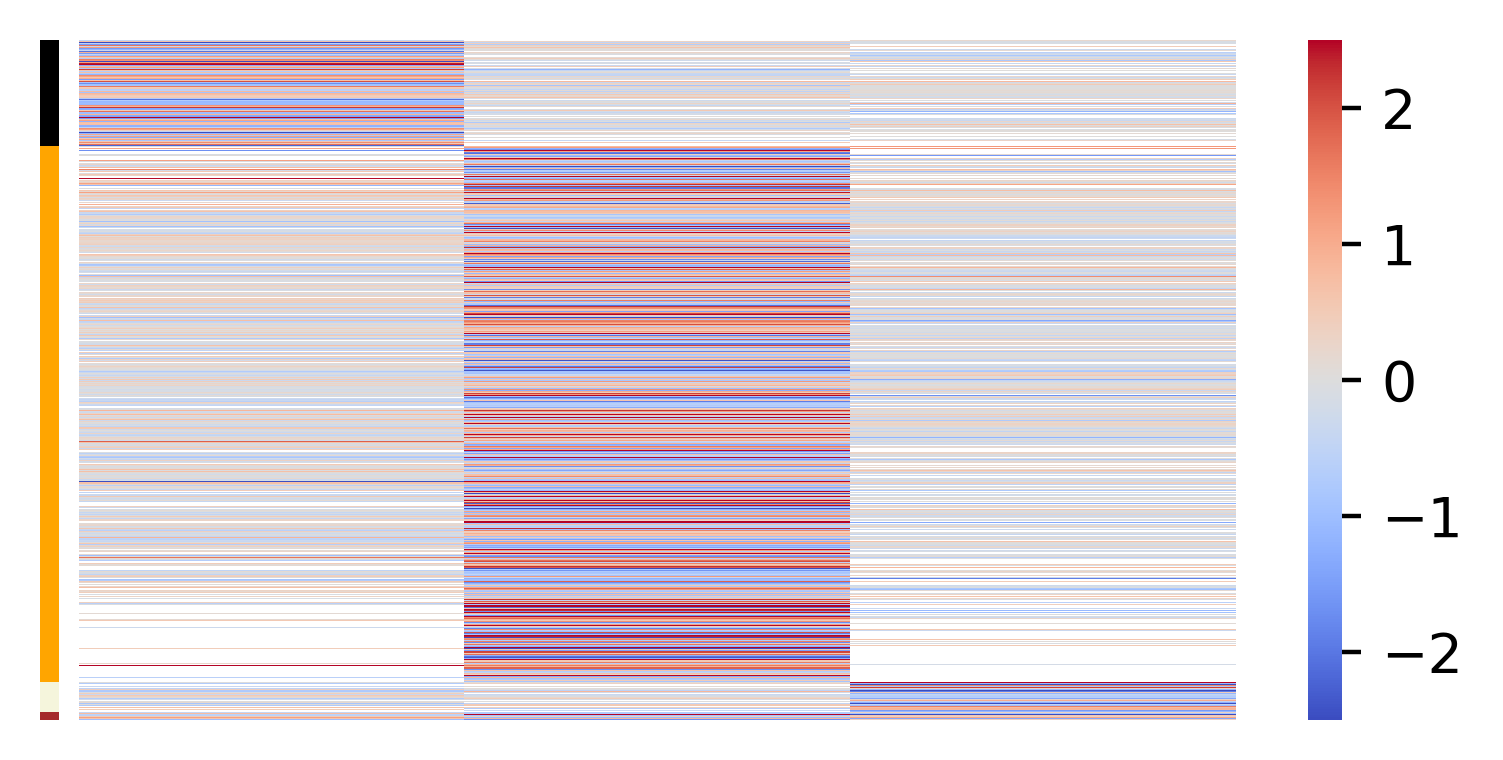

In [61]:
fig, ax = plt.subplots(figsize=(4, 2), dpi=400)
ax = sns.heatmap(
    dfff[['sa_kau3286.l', 'q_Chenopodium_quinoa', 'sp_log2FoldChange']],
    vmin=-2.5,
    vmax=2.5,
    center=0,
    cmap='coolwarm',
    yticklabels=False,  # 隐藏 y 轴刻度标签
    xticklabels=False
)

# 隐藏 y 轴刻度线
ax.tick_params(left=False)
ax.tick_params(bottom=False)


import matplotlib.patches as patches
ranges_colors = [
    (0, 1182, 'black'),
    (1182, 1182+5980, 'orange'),
    (1182+5980, 1182+5980+343, 'beige'),
    (1182+5980+343, 1182+5980+343+85, 'brown')
]

# 左侧添加色条，使用很窄的矩形条显示颜色（宽度为负数即可放左边）
for start, end, color in ranges_colors:
    rect = patches.Rectangle(
        (-0.05, start),     # x = -0.5 在热图左侧
        -0.05,              # 宽度为负，向左扩展
        end - start,       # 高度
        linewidth=0,
        facecolor=color,
        transform=ax.transData,
        clip_on=False,
        zorder=3
    )
    ax.add_patch(rect)

# 隐藏刻度线
ax.tick_params(left=False, bottom=False)

plt.tight_layout()
#plt.savefig('6_weeks_0_600_heatmap_new.tif', format='tiff', dpi=600, pil_kwargs={"compression": "tiff_lzw"})
plt.show()

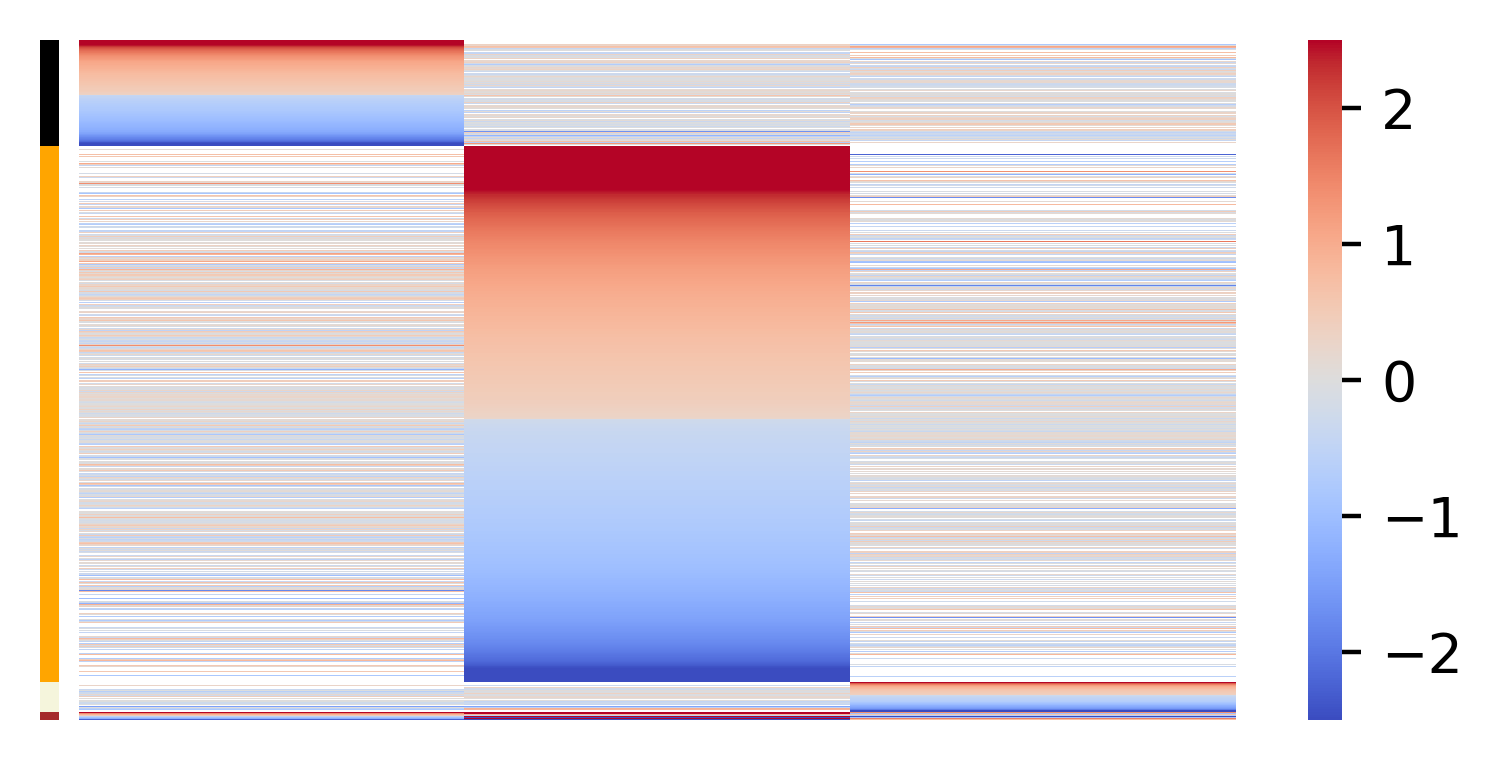

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches

ranges_colors = [
    (0, 1182, 'black'),
    (1182, 1182+5980, 'orange'),
    (1182+5980, 1182+5980+343, 'beige'),
    (1182+5980+343, 1182+5980+343+85, 'brown')
]


df1 = dfff.iloc[ranges_colors[0][0]:ranges_colors[0][1]].copy()
df2 = dfff.iloc[ranges_colors[1][0]:ranges_colors[1][1]].copy()
df3 = dfff.iloc[ranges_colors[2][0]:ranges_colors[2][1]].copy()
df4 = dfff.iloc[ranges_colors[3][0]:ranges_colors[3][1]].copy()


df1_sorted = df1.sort_values(by='sa_kau3286.l', ascending=False)
df2_sorted = df2.sort_values(by='q_Chenopodium_quinoa', ascending=False)
df3_sorted = df3.sort_values(by='sp_log2FoldChange', ascending=False)
df4_sorted = df4.sort_values(by='sa_kau3286.l', ascending=False)


dfff_sorted = pd.concat([df1_sorted, df2_sorted, df3_sorted, df4_sorted], axis=0)


new_ranges = []
start = 0
for start_idx, end_idx, color in ranges_colors:
    length = end_idx - start_idx
    new_ranges.append((start, start + length, color))
    start += length


fig, ax = plt.subplots(figsize=(4, 2), dpi=400)
ax = sns.heatmap(
    dfff_sorted[['sa_kau3286.l', 'q_Chenopodium_quinoa', 'sp_log2FoldChange']],
    vmin=-2.5,
    vmax=2.5,
    center=0,
    cmap='coolwarm',
    yticklabels=False,
    xticklabels=False
)

ax.tick_params(left=False, bottom=False)


for start, end, color in new_ranges:
    rect = patches.Rectangle(
        (-0.05, start),
        -0.05,
        end - start,
        linewidth=0,
        facecolor=color,
        transform=ax.transData,
        clip_on=False,
        zorder=3
    )
    ax.add_patch(rect)

plt.tight_layout()
#plt.savefig('6_weeks_0_600_heatmap_new.tif', format='tiff', dpi=600, pil_kwargs={"compression": "tiff_lzw"})
plt.show()


In [315]:
sa_deg = df1_sorted[["kau3286.l"]]
sa_deg.columns = ["gene"]
sa_deg.to_csv("0_600_DEG.csv",index=False)

In [309]:
import pandas as pd

In [316]:
df_Go = pd.read_csv("6weeks_0_600_salic_GO_enrichment.csv")

In [317]:
df_Go = df_Go[df_Go["pvalue"] <= 0.05]

In [318]:
df_Go.to_csv("6weeks_0_600_salic_GO_enrichment_005.csv",index=False)

In [382]:
sa_deg = pd.read_csv("0_600_DEG.csv")
len(sa_deg)

1182

In [385]:
df_sa_an = pd.read_csv("out.emapper.annotations.csv")
df_sa_an = df_sa_an[["query","Description"]]
df_sa_an.columns = ["gene","Description"]
df_sa_an = df_sa_an.drop_duplicates()

In [388]:
sa_deg = sa_deg.merge(df_sa_an,on="gene", how="left")

In [389]:
sa_deg.to_csv("0_600_DEG_black_ann.csv",index=False)

In [319]:
import pandas as pd
import matplotlib.pyplot as plt

In [320]:
df = pd.read_csv("6weeks_0_600_salic_GO_enrichment_005_keep.csv")

In [321]:
df["GeneRatio"] = df["GeneRatio"].apply(lambda x:int(x.split("/")[0])/int(x.split("/")[1]))

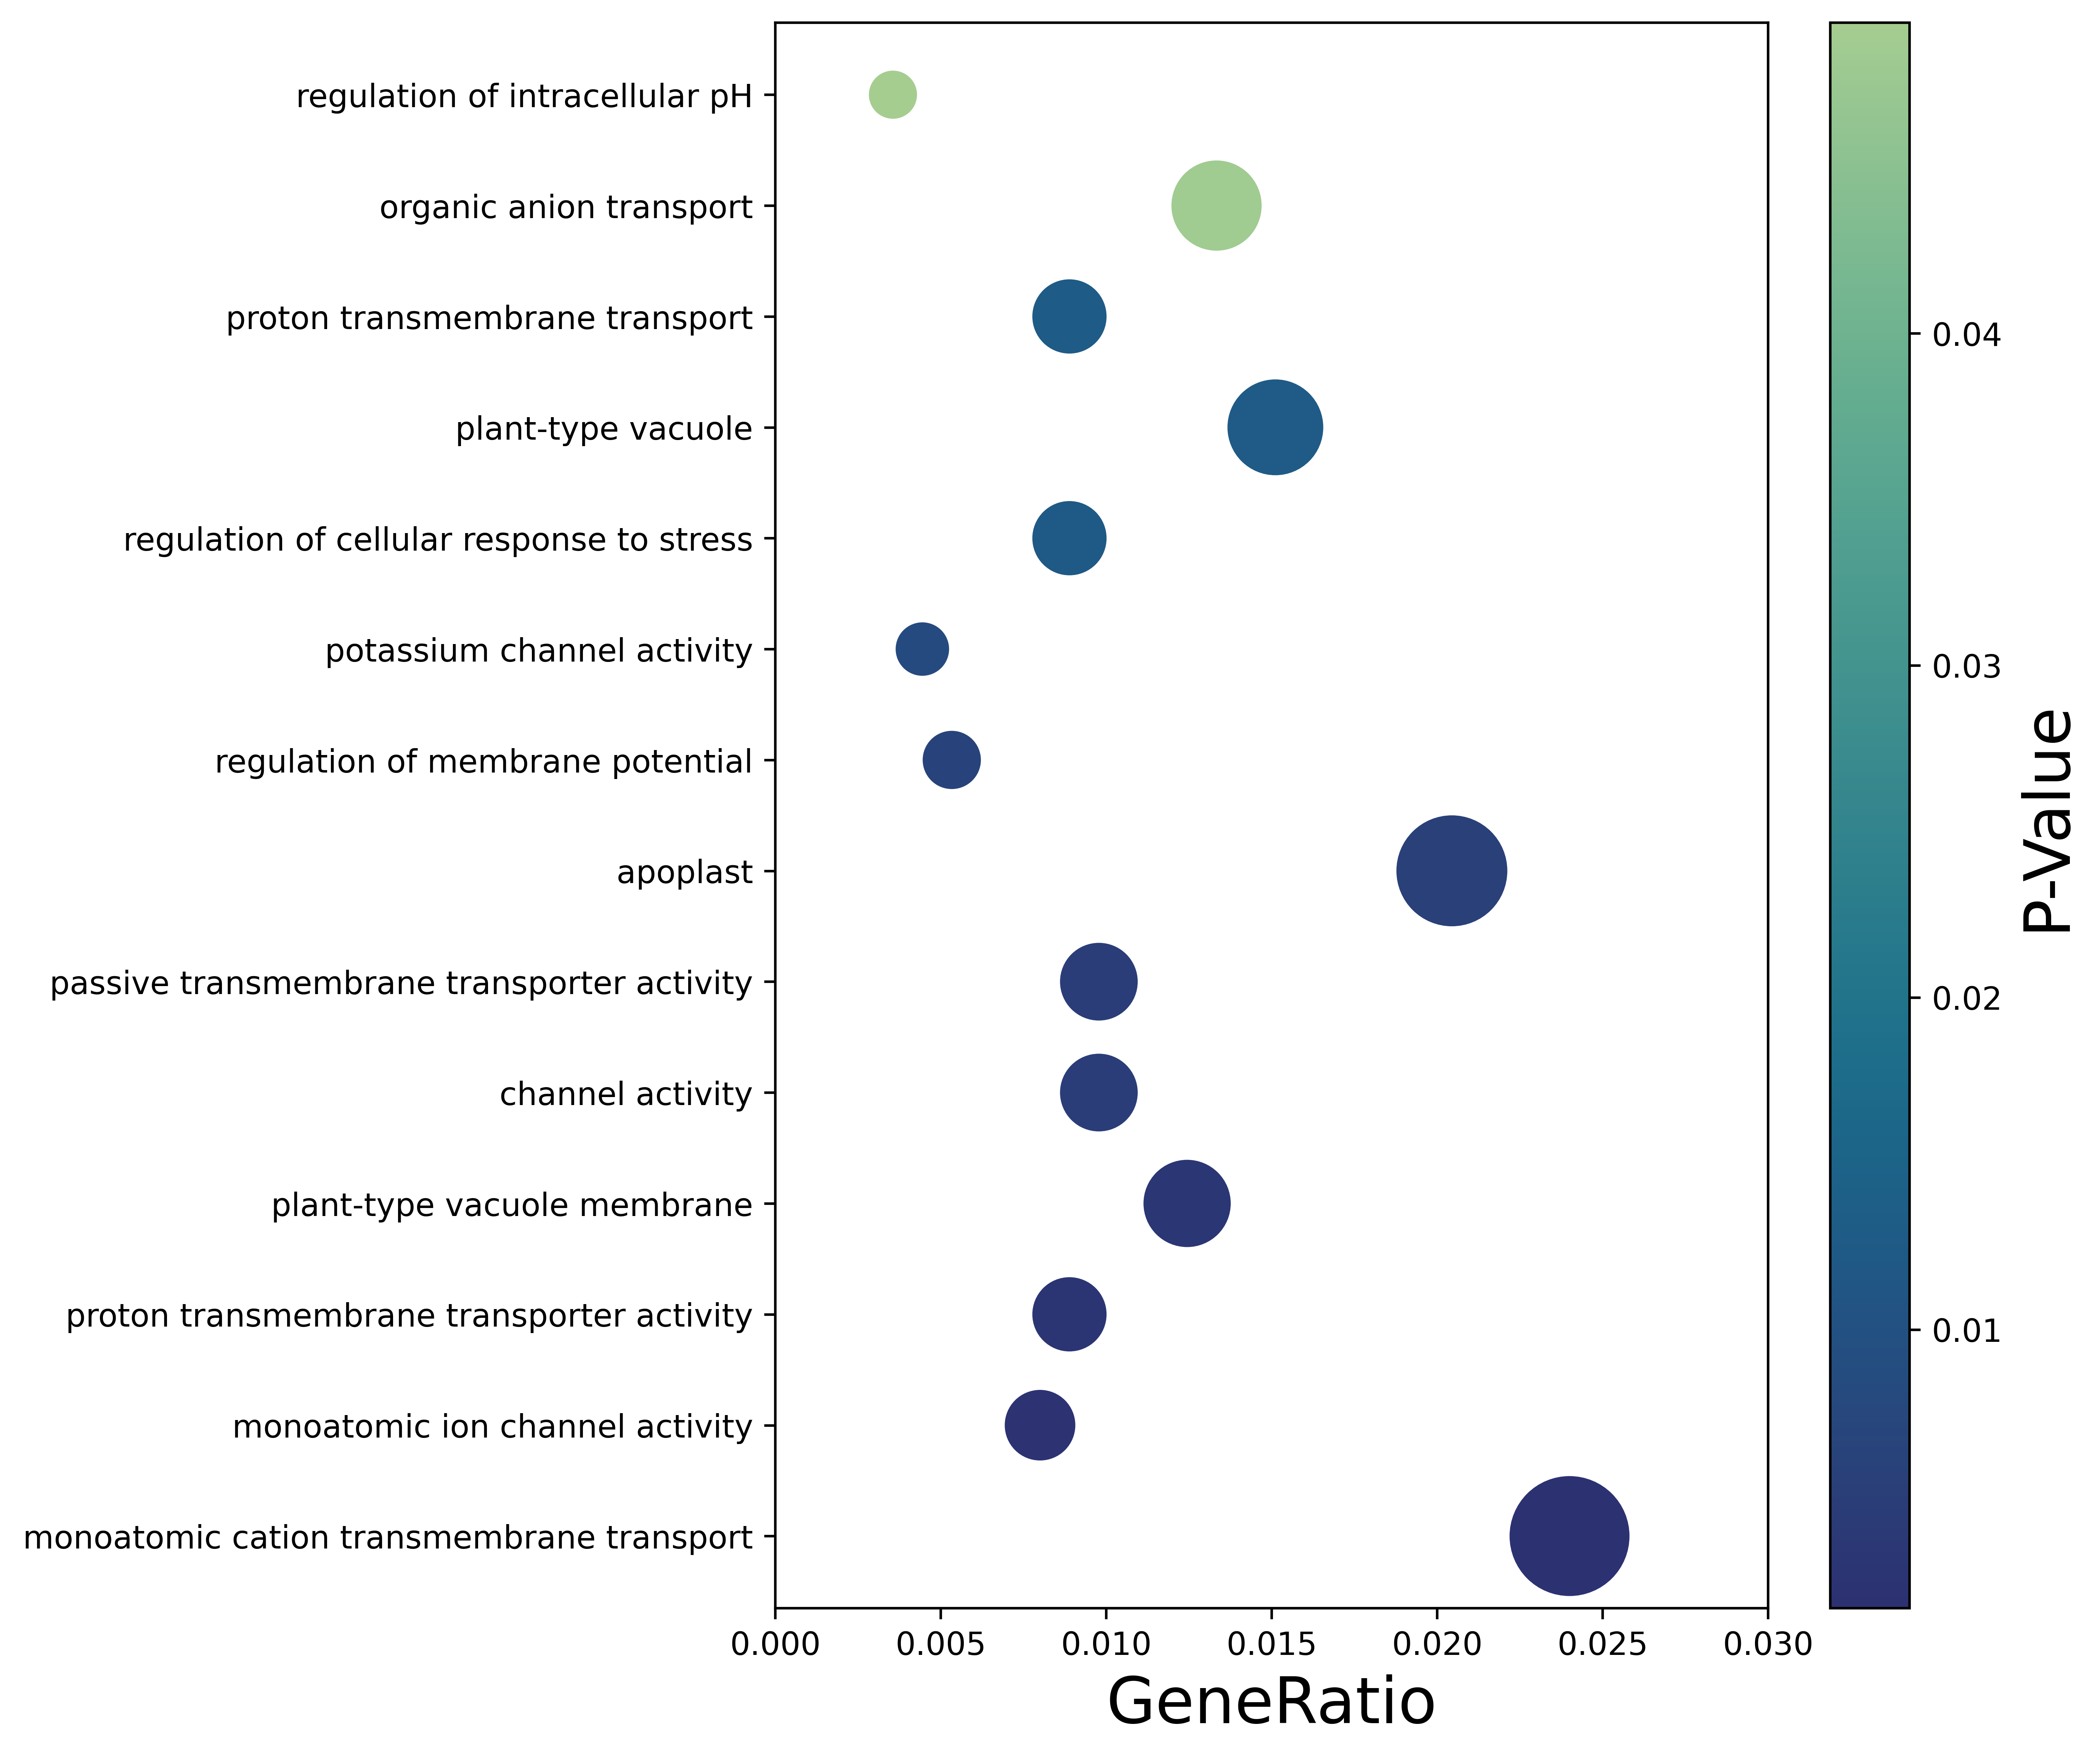

In [330]:
plt.figure(figsize=(7,9), dpi=600)
#plt.grid(ls='-')
plt.xlim(0, 0.03)
plt.scatter(x=[df["GeneRatio"]], y=df['Description'],s=df["Count"]*50,c =df["pvalue"]
,cmap = "crest_r")
cb = plt.colorbar()
cb.set_label('P-Value',size=20)
plt.xlabel("GeneRatio",size=20)
plt.savefig('sa_go_6weeks_50mM_600mM.pdf', format='pdf', bbox_inches='tight')
plt.savefig('sa_go_6weeks_50mM_600mM_noline.tif', format='tiff', pil_kwargs={"compression": "tiff_lzw"})
plt.show()

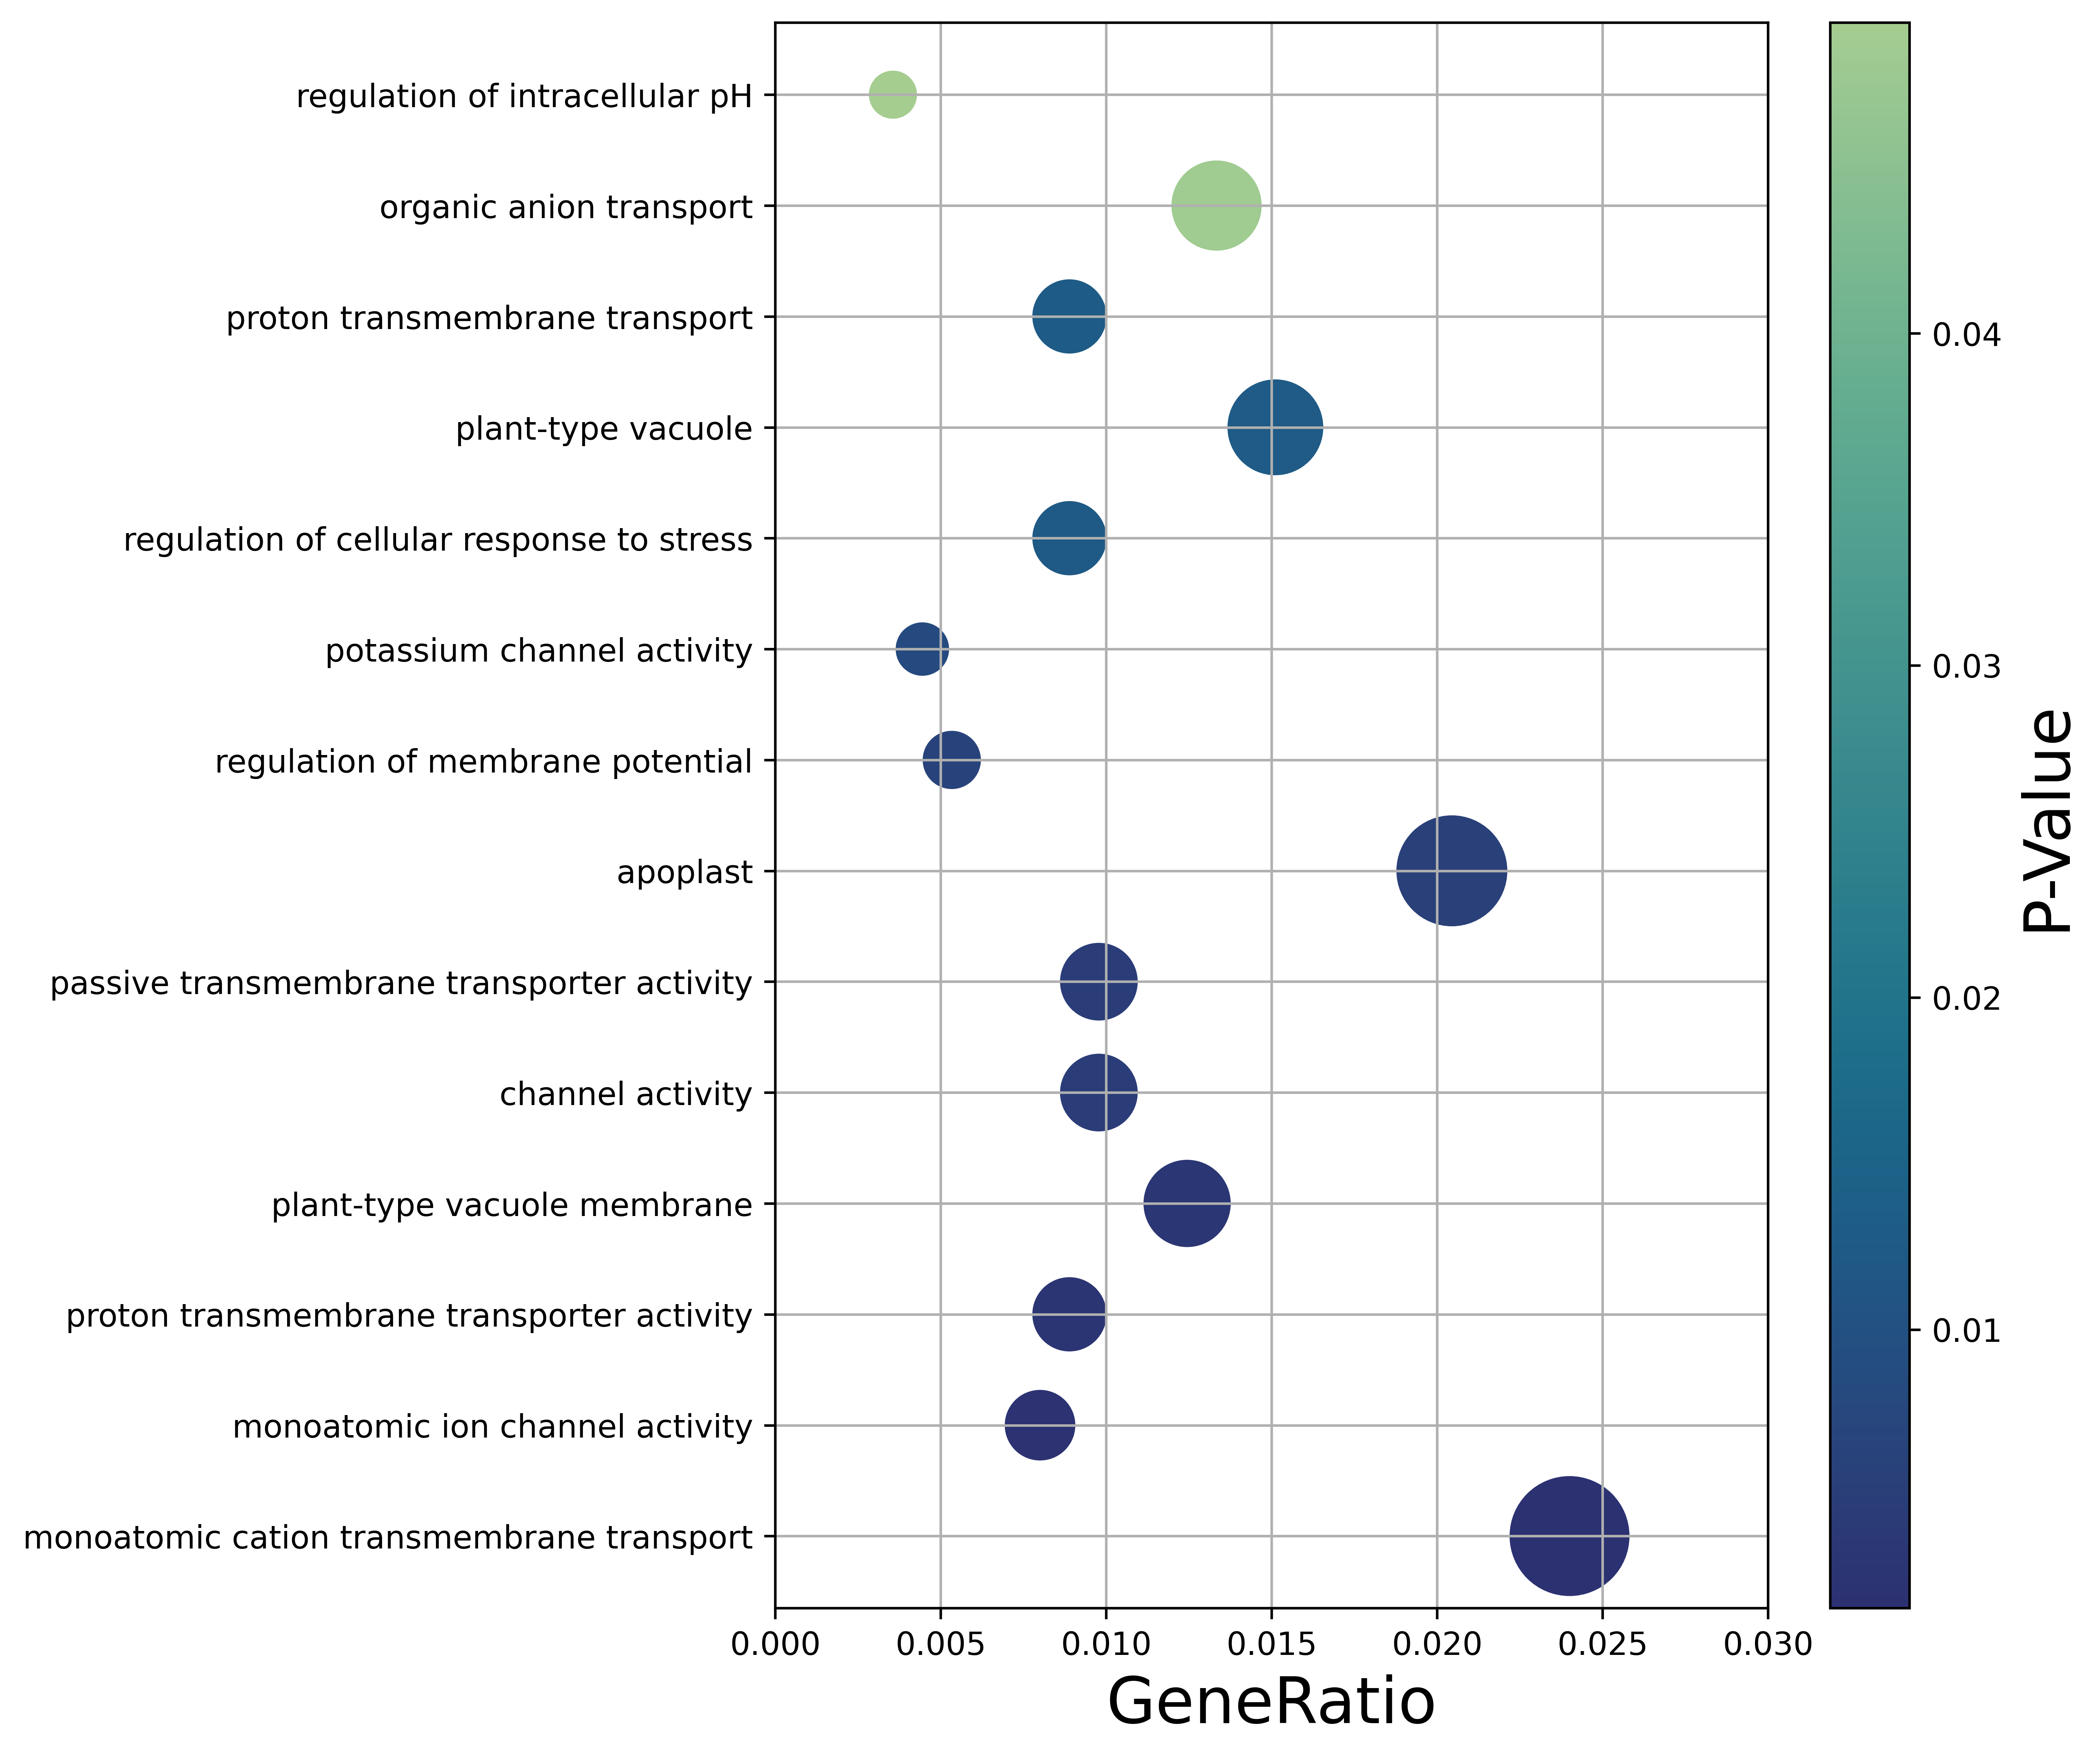

In [329]:
plt.figure(figsize=(7,9), dpi=600)
plt.grid(ls='-')
plt.xlim(0, 0.03)
plt.scatter(x=[df["GeneRatio"]], y=df['Description'],s=df["Count"]*50,c =df["pvalue"]
,cmap = "crest_r")
cb = plt.colorbar()
cb.set_label('P-Value',size=20)
plt.xlabel("GeneRatio",size=20)
plt.savefig('sal_go_6weeks_0mM_600mM.tif', format='tiff', pil_kwargs={"compression": "tiff_lzw"})
plt.show()

In [339]:
bigelovii_SRR28511839_fpkm = pd.read_csv("/home/wangy1j/annotation/fpkm/bigelovii/SRR28511839_fpkm/genes.fpkm_tracking",sep="\t",usecols=['gene_id', 'FPKM'])
bigelovii_SRR28511839_fpkm.columns = ['gene_id', 'big_600_rep1']
bigelovii_SRR28511847_fpkm = pd.read_csv("/home/wangy1j/annotation/fpkm/bigelovii/SRR28511847_fpkm/genes.fpkm_tracking",sep="\t",usecols=['gene_id', 'FPKM'])
bigelovii_SRR28511847_fpkm.columns = ['gene_id', 'big_600_rep2']
bigelovii_SRR28511848_fpkm = pd.read_csv("/home/wangy1j/annotation/fpkm/bigelovii/SRR28511848_fpkm/genes.fpkm_tracking",sep="\t",usecols=['gene_id', 'FPKM'])
bigelovii_SRR28511848_fpkm.columns = ['gene_id', 'big_600_rep3']
bigelovii_SRR28511846_fpkm = pd.read_csv("/home/wangy1j/annotation/fpkm/bigelovii/SRR28511846_fpkm/genes.fpkm_tracking",sep="\t",usecols=['gene_id', 'FPKM'])
bigelovii_SRR28511846_fpkm.columns = ['gene_id', 'big_wt_rep1']
bigelovii_SRR28511849_fpkm = pd.read_csv("/home/wangy1j/annotation/fpkm/bigelovii/SRR28511849_fpkm/genes.fpkm_tracking",sep="\t",usecols=['gene_id', 'FPKM'])
bigelovii_SRR28511849_fpkm.columns = ['gene_id', 'big_wt_rep2']
bigelovii_SRR28511850_fpkm = pd.read_csv("/home/wangy1j/annotation/fpkm/bigelovii/SRR28511850_fpkm/genes.fpkm_tracking",sep="\t",usecols=['gene_id', 'FPKM'])
bigelovii_SRR28511850_fpkm.columns = ['gene_id', 'big_wt_rep3']
bigelovii_all = bigelovii_SRR28511839_fpkm.merge(bigelovii_SRR28511847_fpkm,on="gene_id")
bigelovii_all = bigelovii_all.merge(bigelovii_SRR28511848_fpkm,on="gene_id")
bigelovii_all = bigelovii_all.merge(bigelovii_SRR28511846_fpkm,on="gene_id")
bigelovii_all = bigelovii_all.merge(bigelovii_SRR28511849_fpkm,on="gene_id")
bigelovii_all = bigelovii_all.merge(bigelovii_SRR28511850_fpkm,on="gene_id")
Spinacia_SRR12524859_fpkm = pd.read_csv("SRR12524859_fpkm_new_gsawomen/genes.fpkm_tracking",sep="\t",usecols=['gene_id', 'FPKM'])
Spinacia_SRR12524859_fpkm.columns = ['gene_id', 'Sp_wt_rep1']
Spinacia_SRR12524860_fpkm = pd.read_csv("SRR12524860_fpkm_new_gsawomen/genes.fpkm_tracking",sep="\t",usecols=['gene_id', 'FPKM'])
Spinacia_SRR12524860_fpkm.columns = ['gene_id', 'Sp_wt_rep2']
Spinacia_SRR12524861_fpkm = pd.read_csv("SRR12524861_fpkm_new_gsawomen/genes.fpkm_tracking",sep="\t",usecols=['gene_id', 'FPKM'])
Spinacia_SRR12524861_fpkm.columns = ['gene_id', 'Sp_wt_rep3']
Spinacia_SRR12524868_fpkm = pd.read_csv("SRR12524868_fpkm_new_gsawomen/genes.fpkm_tracking",sep="\t",usecols=['gene_id', 'FPKM'])
Spinacia_SRR12524868_fpkm.columns = ['gene_id', 'Sp_85_rep1']
Spinacia_SRR12524870_fpkm = pd.read_csv("SRR12524870_fpkm_new_gsawomen/genes.fpkm_tracking",sep="\t",usecols=['gene_id', 'FPKM'])
Spinacia_SRR12524870_fpkm.columns = ['gene_id', 'Sp_85_rep2']
Spinacia_SRR12524871_fpkm = pd.read_csv("SRR12524871_fpkm_new_gsawomen/genes.fpkm_tracking",sep="\t",usecols=['gene_id', 'FPKM'])
Spinacia_SRR12524871_fpkm.columns = ['gene_id', 'Sp_85_rep3']
Spinacia_all = Spinacia_SRR12524859_fpkm.merge(Spinacia_SRR12524860_fpkm,on="gene_id")
Spinacia_all = Spinacia_all.merge(Spinacia_SRR12524861_fpkm,on="gene_id")
Spinacia_all = Spinacia_all.merge(Spinacia_SRR12524868_fpkm,on="gene_id")
Spinacia_all = Spinacia_all.merge(Spinacia_SRR12524870_fpkm,on="gene_id")
Spinacia_all = Spinacia_all.merge(Spinacia_SRR12524871_fpkm,on="gene_id")
quinoa_SRR25279647_fpkm = pd.read_csv("/home/wangy1j/annotation/fpkm/quinoa/SRR25279647_fpkm/genes.fpkm_tracking",sep="\t",usecols=['gene_id', 'FPKM'])
quinoa_SRR25279647_fpkm.columns = ['gene_id', 'quinoa_200_rep1']
quinoa_SRR25279648_fpkm= pd.read_csv("/home/wangy1j/annotation/fpkm/quinoa/SRR25279648_fpkm/genes.fpkm_tracking",sep="\t",usecols=['gene_id', 'FPKM'])
quinoa_SRR25279648_fpkm.columns = ['gene_id', 'quinoa_200_rep2']
quinoa_SRR25279649_fpkm = pd.read_csv("/home/wangy1j/annotation/fpkm/quinoa/SRR25279649_fpkm/genes.fpkm_tracking",sep="\t",usecols=['gene_id', 'FPKM'])
quinoa_SRR25279649_fpkm.columns = ['gene_id', 'quinoa_200_rep3']
quinoa_SRR25279650_fpkm = pd.read_csv("/home/wangy1j/annotation/fpkm/quinoa/SRR25279650_fpkm/genes.fpkm_tracking",sep="\t",usecols=['gene_id', 'FPKM'])
quinoa_SRR25279650_fpkm.columns = ['gene_id', 'quinoa_wt_rep1']
quinoa_SRR25279653_fpkm = pd.read_csv("/home/wangy1j/annotation/fpkm/quinoa/SRR25279653_fpkm/genes.fpkm_tracking",sep="\t",usecols=['gene_id', 'FPKM'])
quinoa_SRR25279653_fpkm.columns = ['gene_id', 'quinoa_wt_rep2']
quinoa_SRR25279654_fpkm = pd.read_csv("/home/wangy1j/annotation/fpkm/quinoa/SRR25279654_fpkm/genes.fpkm_tracking",sep="\t",usecols=['gene_id', 'FPKM'])
quinoa_SRR25279654_fpkm.columns = ['gene_id', 'quinoa_wt_rep3']
quinoa_all = quinoa_SRR25279647_fpkm.merge(quinoa_SRR25279648_fpkm,on="gene_id")
quinoa_all = quinoa_all.merge(quinoa_SRR25279649_fpkm,on="gene_id")
quinoa_all = quinoa_all.merge(quinoa_SRR25279650_fpkm,on="gene_id")
quinoa_all = quinoa_all.merge(quinoa_SRR25279653_fpkm,on="gene_id")
quinoa_all = quinoa_all.merge(quinoa_SRR25279654_fpkm,on="gene_id")
df_orth = pd.read_csv("../Orthogroups.tsv",sep="\t")
df_orth = df_orth[['Orthogroup', 'Chenopodium_quinoa','Spinacia_oleraceav3', 'kau3286.l']]

In [340]:
df_orth['kau3286.l'] = df_orth['kau3286.l'].str.replace(r'\.t\d+', '', regex=True)
df_orth['Chenopodium_quinoa'] = df_orth['Chenopodium_quinoa'].str.replace('-RA', '')

In [341]:
Spinacia_all['gene_id'] = Spinacia_all['gene_id'].str.replace('.Spov3', '')

/tmp/ipykernel_1694891/2596626039.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  Spinacia_all['gene_id'] = Spinacia_all['gene_id'].str.replace('.Spov3', '')


In [342]:
quinoa_all = quinoa_all[['gene_id', 'quinoa_wt_rep1', 'quinoa_wt_rep2', 'quinoa_wt_rep3','quinoa_200_rep1', 'quinoa_200_rep2', 'quinoa_200_rep3']]
bigelovii_all = bigelovii_all[['gene_id', 'big_wt_rep1', 'big_wt_rep2', 'big_wt_rep3','big_600_rep1', 'big_600_rep2', 'big_600_rep3']]

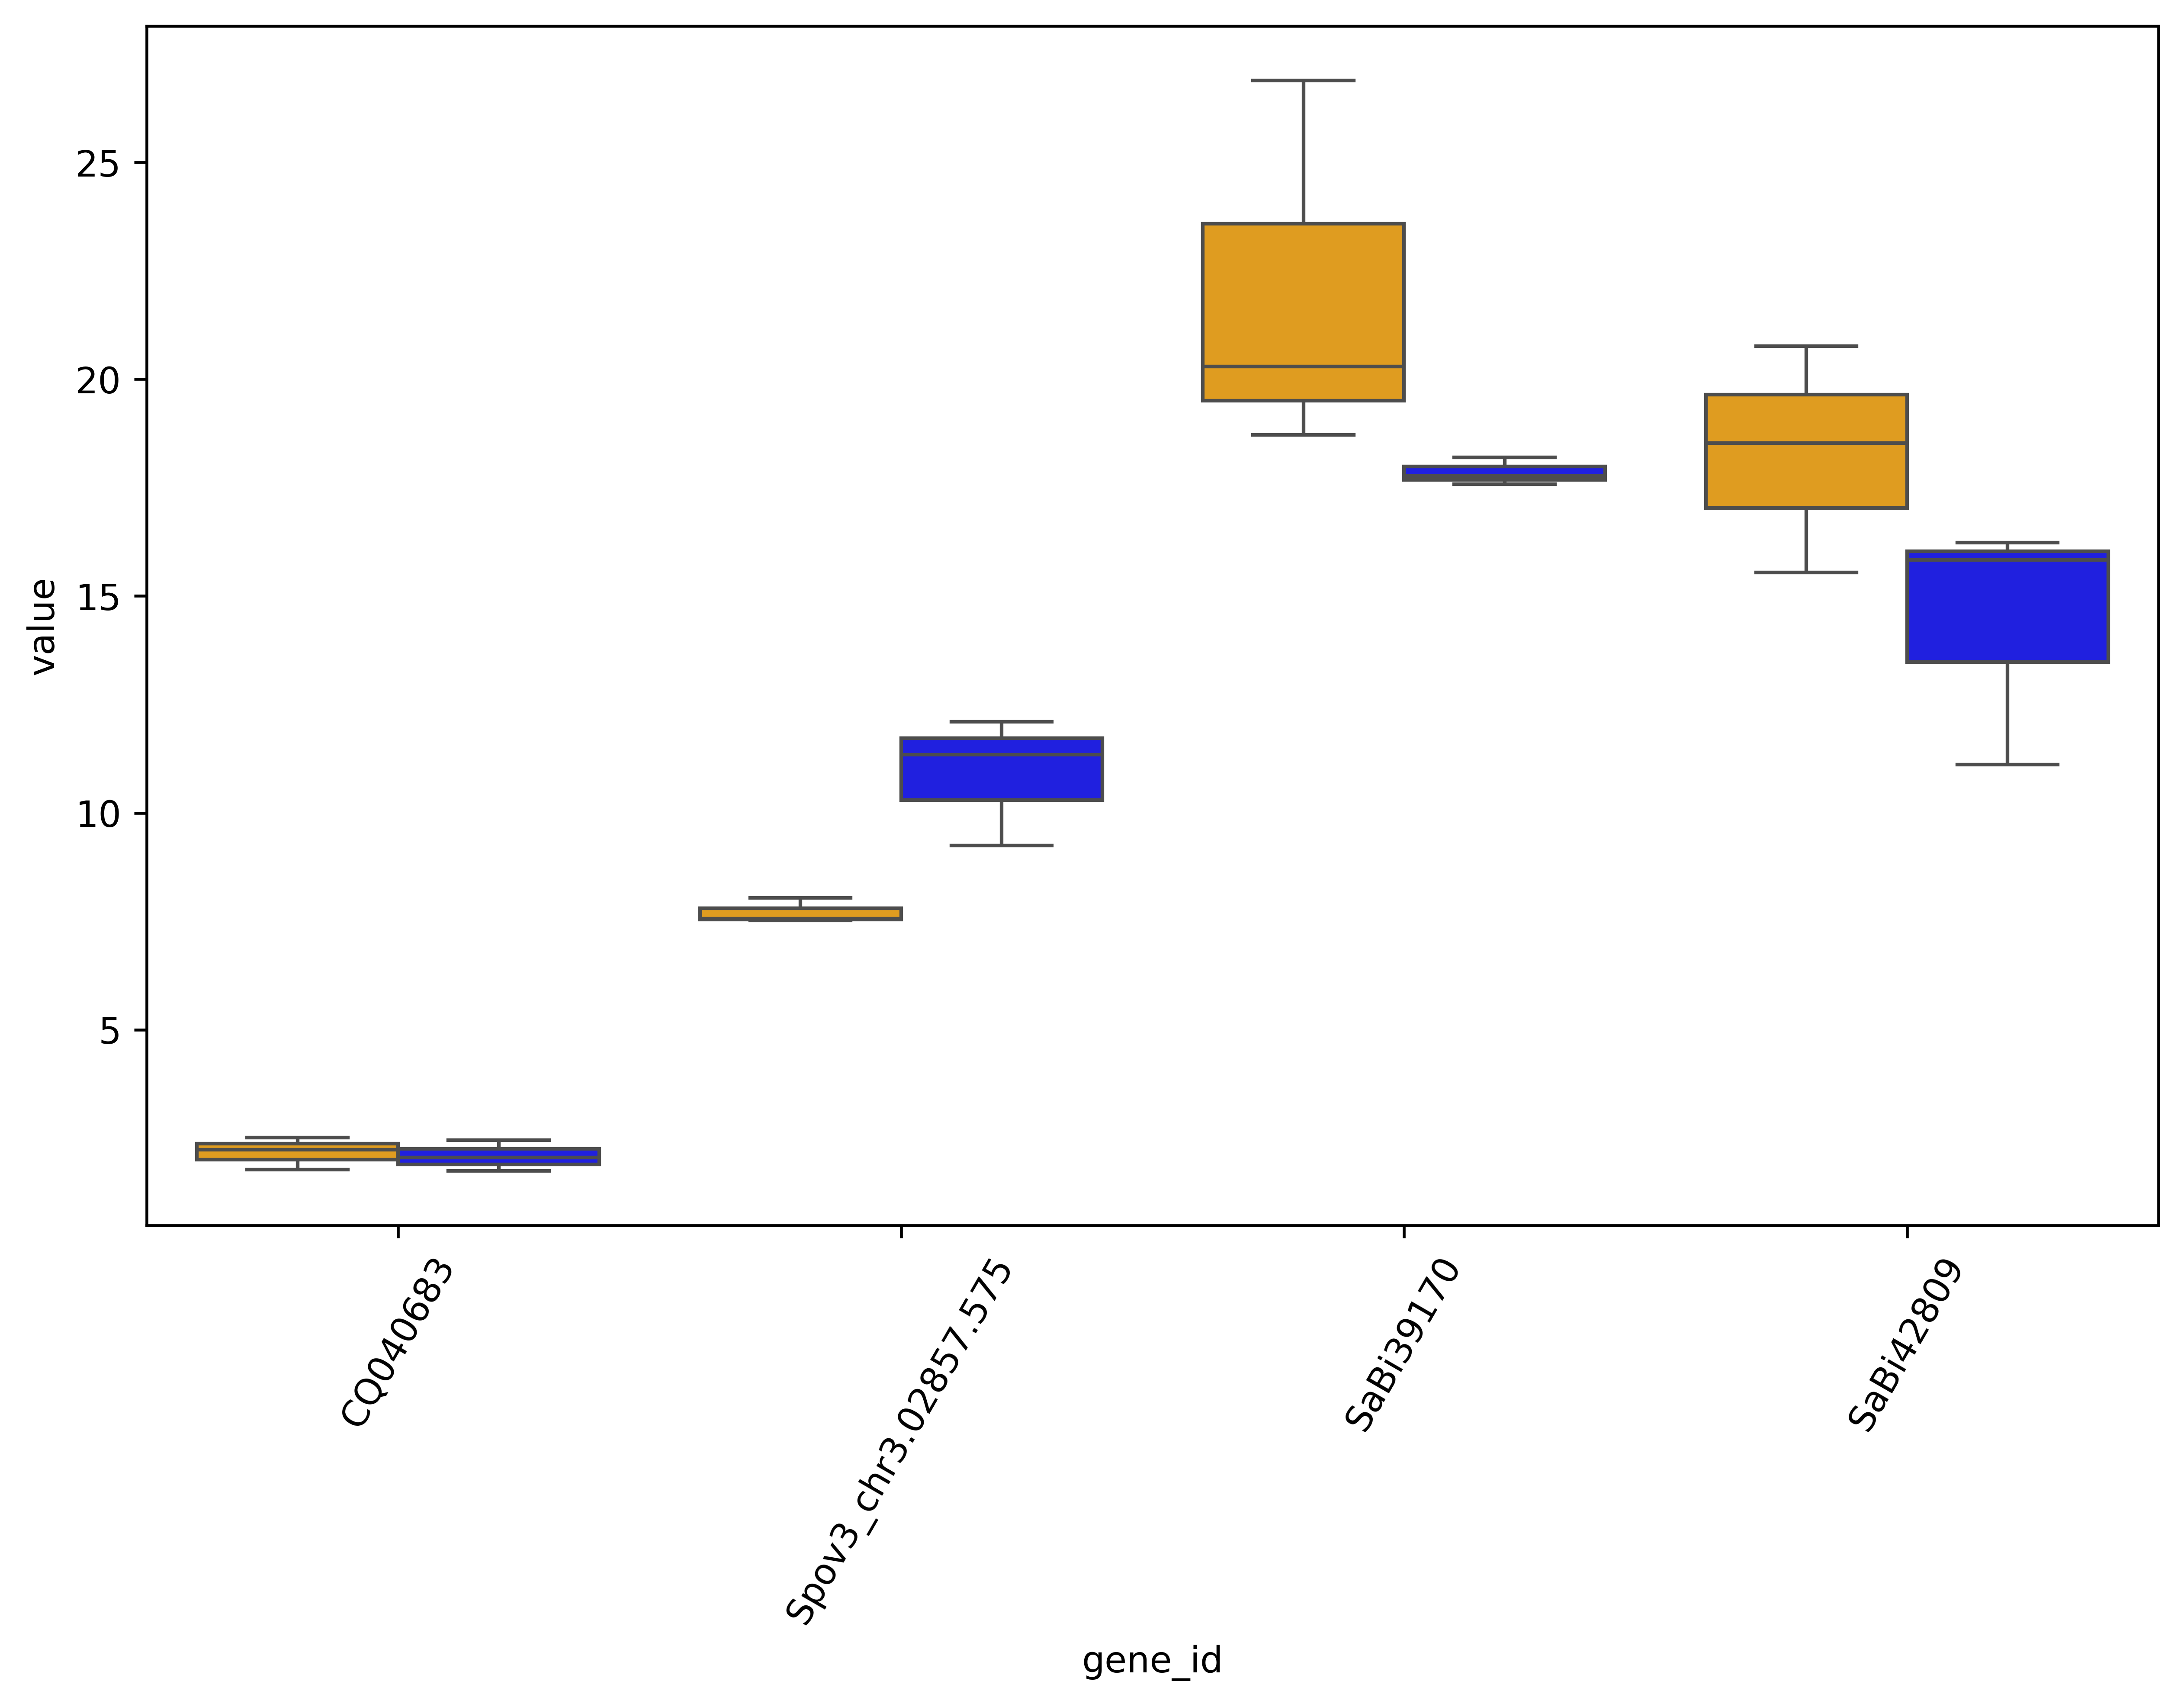

In [371]:
Chenopodium_quinoa_gene = df_orth[df_orth["Orthogroup"] == "OG0014127"]["Chenopodium_quinoa"].apply(lambda x:x.split(", ")).values[0]
Spinacia_oleraceav3_gene = df_orth[df_orth["Orthogroup"] == "OG0014127"]["Spinacia_oleraceav3"].apply(lambda x:x.split(", ")).values[0]
kau3286_gene = df_orth[df_orth["Orthogroup"] == "OG0014127"]["kau3286.l"].apply(lambda x:x.split(", ")).values[0]
df_tmp_Chenopodium = pd.DataFrame()
df_tmp_Spinacia = pd.DataFrame()
df_tmp_kau3286 = pd.DataFrame()
df_tmp_Chenopodium["gene_id"] = Chenopodium_quinoa_gene
df_tmp_Spinacia["gene_id"] = Spinacia_oleraceav3_gene
df_tmp_kau3286["gene_id"] = kau3286_gene
df_tmp_Chenopodium = df_tmp_Chenopodium.merge(quinoa_all,on="gene_id")
df_tmp_Spinacia = Spinacia_all[Spinacia_all["gene_id"].str.contains("Spov3_chr3.02857")]
df_tmp_kau3286 = df_tmp_kau3286.merge(bigelovii_all,on="gene_id")
df_tmp_Chenopodium.columns = ['gene_id', 'wt_rep1', 'wt_rep2', 'wt_rep3','salt_rep1', 'salt_rep2', 'salt_rep3']
df_tmp_Spinacia.columns = ['gene_id', 'wt_rep1', 'wt_rep2', 'wt_rep3','salt_rep1', 'salt_rep2', 'salt_rep3']
df_tmp_kau3286.columns = ['gene_id', 'wt_rep1', 'wt_rep2', 'wt_rep3','salt_rep1', 'salt_rep2', 'salt_rep3']
df_tem = pd.concat([df_tmp_Chenopodium,df_tmp_Spinacia])
df_tem = pd.concat([df_tem,df_tmp_kau3286])
df_melted = pd.melt(df_tem, id_vars='gene_id', value_vars=['wt_rep1', 'wt_rep2', 'wt_rep3', 'salt_rep1', 'salt_rep2', 'salt_rep3'],
                    var_name='condition', value_name='value')
    # 创建一个新的列 'group'，用于区分 'wt' 和 'salt'
df_melted['group'] = df_melted['condition'].apply(lambda x: 'wt' if 'wt' in x else 'salt')
    # 绘制箱线图
plt.figure(figsize=(10, 6), dpi=600)
sns.boxplot(x='gene_id', y='value', hue='group', data=df_melted, palette=["orange", "blue"])
plt.xticks(rotation=60)
plt.legend().remove()  
plt.savefig('SOS2.tif', format='tiff', pil_kwargs={"compression": "tiff_lzw"})
plt.show()


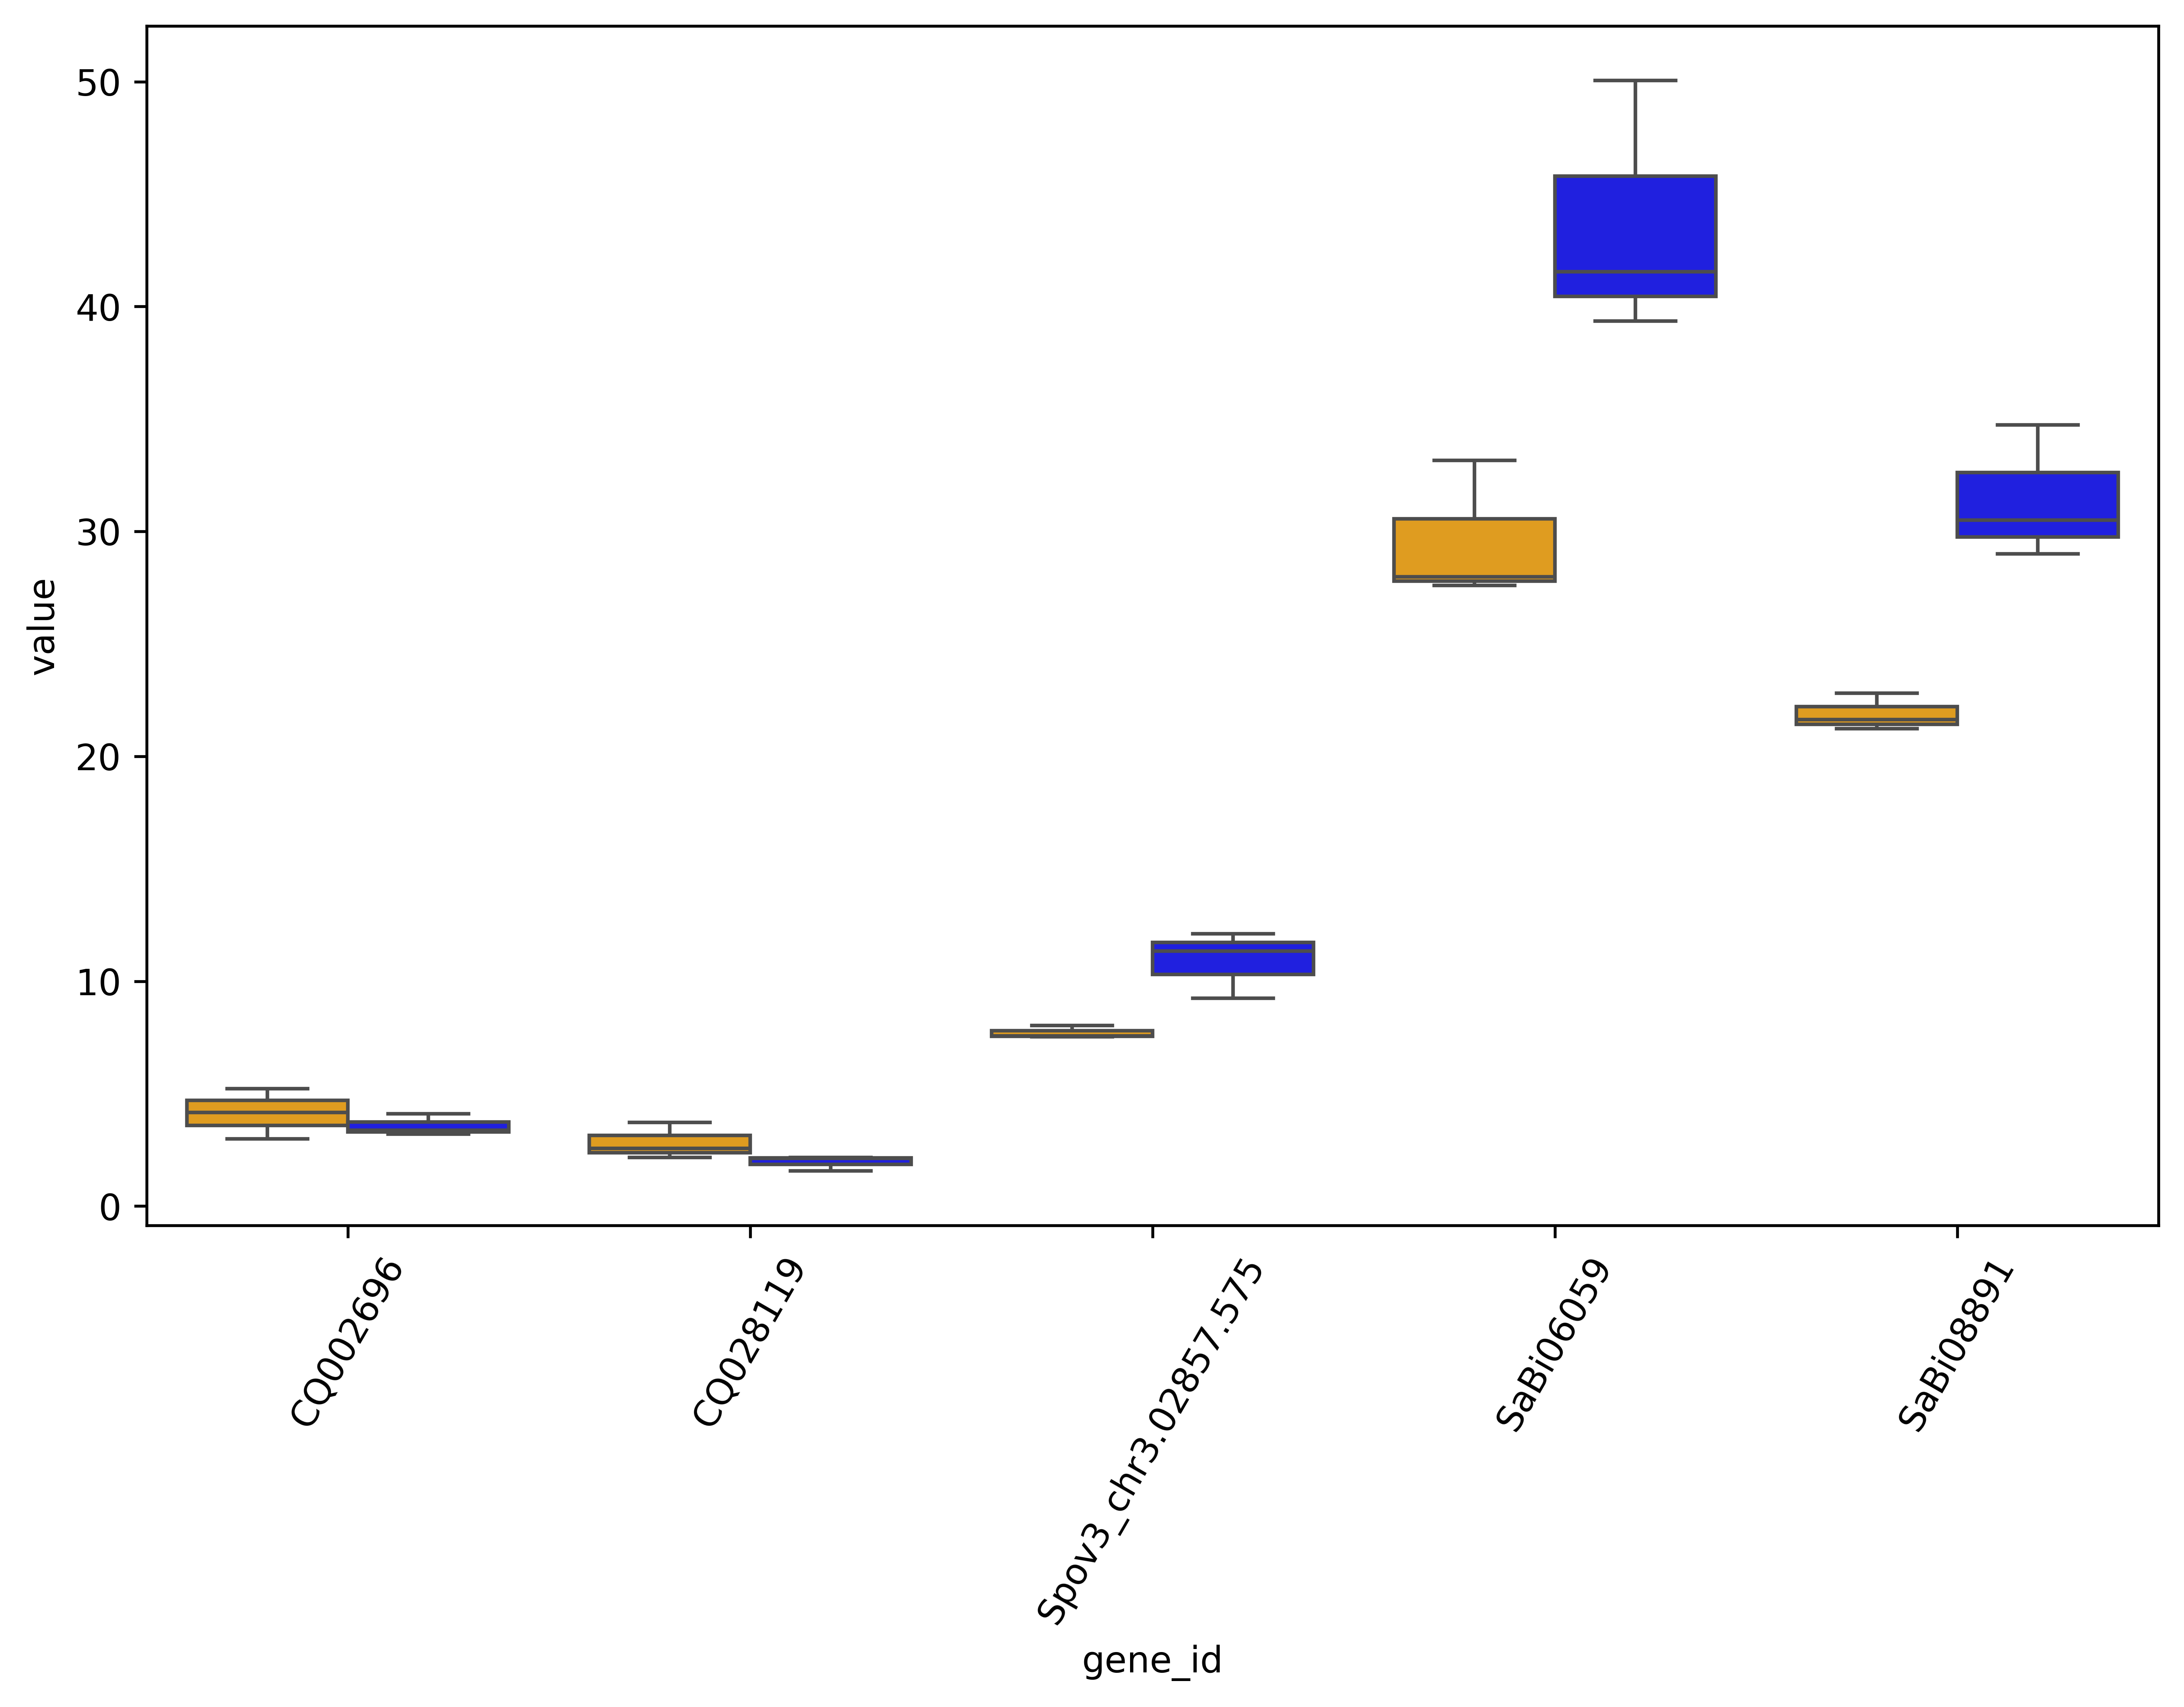

In [370]:
Chenopodium_quinoa_gene = df_orth[df_orth["Orthogroup"] == "OG0006445"]["Chenopodium_quinoa"].apply(lambda x:x.split(", ")).values[0]
Spinacia_oleraceav3_gene = df_orth[df_orth["Orthogroup"] == "OG0006445"]["Spinacia_oleraceav3"].apply(lambda x:x.split(", ")).values[0]
kau3286_gene = df_orth[df_orth["Orthogroup"] == "OG0006445"]["kau3286.l"].apply(lambda x:x.split(", ")).values[0]
df_tmp_Chenopodium = pd.DataFrame()
df_tmp_Spinacia = pd.DataFrame()
df_tmp_kau3286 = pd.DataFrame()
df_tmp_Chenopodium["gene_id"] = Chenopodium_quinoa_gene
df_tmp_Spinacia["gene_id"] = Spinacia_oleraceav3_gene
df_tmp_kau3286["gene_id"] = kau3286_gene
df_tmp_Chenopodium = df_tmp_Chenopodium.merge(quinoa_all,on="gene_id")
df_tmp_Spinacia = Spinacia_all[Spinacia_all["gene_id"].str.contains("Spov3_chr3.02857")]
df_tmp_kau3286 = df_tmp_kau3286.merge(bigelovii_all,on="gene_id")
df_tmp_Chenopodium.columns = ['gene_id', 'wt_rep1', 'wt_rep2', 'wt_rep3','salt_rep1', 'salt_rep2', 'salt_rep3']
df_tmp_Spinacia.columns = ['gene_id', 'wt_rep1', 'wt_rep2', 'wt_rep3','salt_rep1', 'salt_rep2', 'salt_rep3']
df_tmp_kau3286.columns = ['gene_id', 'wt_rep1', 'wt_rep2', 'wt_rep3','salt_rep1', 'salt_rep2', 'salt_rep3']
df_tem = pd.concat([df_tmp_Chenopodium,df_tmp_Spinacia])
df_tem = pd.concat([df_tem,df_tmp_kau3286])
df_melted = pd.melt(df_tem, id_vars='gene_id', value_vars=['wt_rep1', 'wt_rep2', 'wt_rep3', 'salt_rep1', 'salt_rep2', 'salt_rep3'],
                    var_name='condition', value_name='value')
    # 创建一个新的列 'group'，用于区分 'wt' 和 'salt'
df_melted['group'] = df_melted['condition'].apply(lambda x: 'wt' if 'wt' in x else 'salt')
    # 绘制箱线图
plt.figure(figsize=(10, 6), dpi=600)
sns.boxplot(x='gene_id', y='value', hue='group', data=df_melted, palette=["orange", "blue"])
plt.xticks(rotation=60)
plt.legend().remove()  
plt.savefig('SOS1.tif', format='tiff', pil_kwargs={"compression": "tiff_lzw"})
plt.show()
